In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

C:\Users\Kashi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = r'C:\Users\Kashi\Downloads\Company_Data.csv'

df = pd.read_csv(file_path)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
bins = [0, 5, 10, float('inf')]  # Customize the bin edges as needed
labels = ['Low', 'Medium', 'High']  # Categories for the bins


In [4]:
# Create a new categorical column based on the "Sales" column
df['SalesCategory'] = pd.cut(df['Sales'], bins=bins, labels=labels, right=False)

In [5]:
df = df.drop('Sales', axis = True) 

In [6]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# List of columns to be label encoded
columns_to_encode = ['ShelveLoc', 'Urban', 'US', 'SalesCategory']

# Apply label encoding to each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [8]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


<AxesSubplot:>

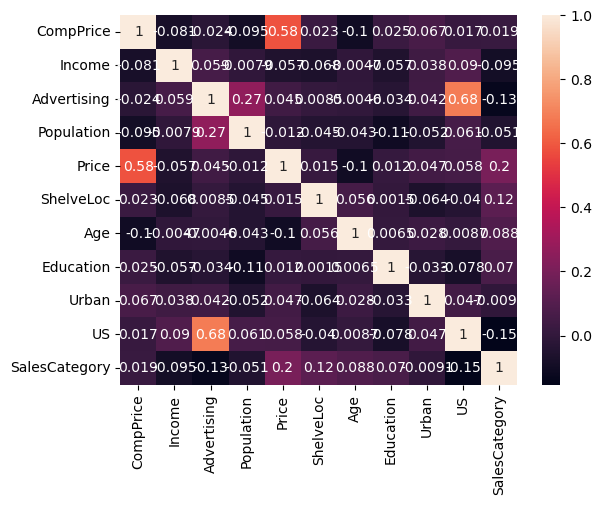

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [11]:
x = df.iloc[:,0:10]
y = df['SalesCategory']

In [12]:
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(x,y)

In [13]:
fit.n_features_

5

In [14]:
fit.support_

array([False, False,  True, False,  True,  True, False,  True, False,
        True])

In [15]:
fit.ranking_

array([2, 5, 1, 6, 1, 1, 3, 1, 4, 1])

In [16]:
r = {'f': x.columns, "f":fit.ranking_}
imp = pd.DataFrame(r)
imp.sort_values('f', inplace = True)
imp

,f
2,1
4,1
5,1
7,1
9,1
0,2
6,3
8,4
1,5
3,6


In [17]:
x = df[['Advertising', 'Price','ShelveLoc','Education', 'US']]
y = df['SalesCategory']

In [18]:
num_trees = 500
#max_features = 3
kfold = KFold(n_splits=15, shuffle=True) #Bootstrap

model = RandomForestClassifier(n_estimators=num_trees,max_depth=5,  min_samples_leaf=5,max_features='sqrt')
results = cross_val_score(model, x, y, cv=kfold)
print(results)

[0.74074074 0.66666667 0.74074074 0.62962963 0.85185185 0.66666667
 0.7037037  0.59259259 0.7037037  0.66666667 0.65384615 0.73076923
 0.69230769 0.57692308 0.57692308]


In [19]:
print(results.mean())

0.6795821462488127


In [20]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,150,200,500]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold)
grid_search.fit(x, y)

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [2, 3, 5],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 150, 200, 500]})

In [21]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 500}
0.6721747388414056
